# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

#### Q1 and Q2
Null hypothesis: there is no difference between white and black callback

Alternative hypothesis: there is difference between white and black callback

In [7]:
df = data[['race','call']]

In [8]:
w = df[df.race=='w']
b = df[df.race=='b']

#### Q3

In [13]:
# Your solution to Q3 here
import matplotlib.pyplot as plt

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    perm_data = np.random.permutation(data)
    perm_data1 = perm_data[1:len(data1)]
    perm_data2 = perm_data[len(data1):] 
    return perm_data1, perm_data2

perm_replicates = np.empty(10000)

for i in range(10000):
    perm_data1, perm_data2 = permutation_sample(w.call, b.call)
    perm_replicates[i] = np.sum(perm_data1) - np.sum(perm_data2)

diff_sum = np.sum(w.call) - np.sum(b.call)

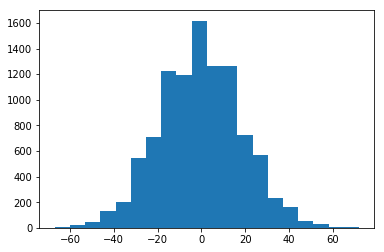

In [14]:
plt.hist(perm_replicates, bins=20)
plt.show()

In [16]:
p = np.sum(perm_replicates>=diff_sum) / len(perm_replicates)
print(p)

0.0


##### Margin of Error

In [17]:
print('Margin of Error is: ')
print(np.percentile(perm_replicates, [2.5, 97.5]))

Margin of Error is: 
[-37.  38.]


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

#### Q4. Statistic significance
The p-value calculated above is 0, suggesting that it is statistically impossible to have the observation (white callback is 78 greater than black callback) given the null hypothesis, which is white callback and black callback are the same.

Therefore, we should reject the null hypothesis.

#### Q5
The analysis suggests that there is a correlation between race and callback. However, we should be careful to jump into the conclusion that race causes the callback difference (correlation is not equal to causation). Other factors, such as education level, could be important as well.  